# Spatial organization of in-connection density
- Spatial organization of in-connection density in different dimensions.

In [1]:
import numpy as np
import pandas as pd

import datajoint as dj

import matplotlib.pyplot as plt

from lib.utils import *
from lib.datajoint import *
from lib.plot import *

%matplotlib inline

## Connect to DataJoint database
- You need to be registered to access the database. Please register [here](https://forms.gle/6SeDGRT8zoLqpbfU9).
- For more information, refer to [README](https://github.com/seung-lab/MicronsBinder/blob/master/notebooks/multiscale/function/README.md) in the repository.
#### Currently, it is temporarily available without registration try running below cell.

In [2]:
# dj.config["database.host"] = "datajoint.ninai.org"
dj.config.load("dj_conf.json")
dj.conn()

pinky = dj.create_virtual_module("seung_pinky", "seung_pinky")

Connecting seung_guest@datajoint.ninai.org:3306


## All pyramidal cells (PyCs)

In [3]:
key = {"segmentation": 185}
pyc_list = (pinky.Neuron() & key).fetch("segment_id")
n_pyc = pyc_list.shape[0]

## PyC with functional data

In [4]:
tune_info = pd.DataFrame(pinky.EASETuning())
pyc_func_list = np.array(tune_info["segment_id"])
n_func = pyc_func_list.shape[0]

osi_p = np.array(tune_info["osi_p"])
dsi_p = np.array(tune_info["dsi_p"])

tune_idx = osi_p<0.01

## Get soma center coordinates

#### All pyramidal cells

In [5]:
pyc_soma_loc = np.zeros((n_pyc, 3))
for i in range(n_pyc):
    
    seg_id = pyc_list[i]
    pyc_soma_loc[i,:] = get_soma_loc(pinky, seg_id)

#### Pyramidal cells with functional data

In [6]:
pyc_func_soma_loc = np.zeros((n_func, 3))
for i in range(n_func):
    
    seg_id = pyc_func_list[i]
    idx = np.where(pyc_list==seg_id)[0][0]
    pyc_func_soma_loc[i,:] = pyc_soma_loc[idx,:]

## Spatial organization of in-connection density

In [7]:
inconn_density = np.zeros((n_func,))
for i in range(n_func):
    
    seg_id = pyc_func_list[i]
    inconn_density[i] = (pinky.SynDensity() & {"segment_id": seg_id}).fetch1("conn_in_dens")

In [8]:
xloc = pyc_func_soma_loc[tune_idx,0]
yloc = pyc_func_soma_loc[tune_idx,1]
zloc = pyc_func_soma_loc[tune_idx,2]

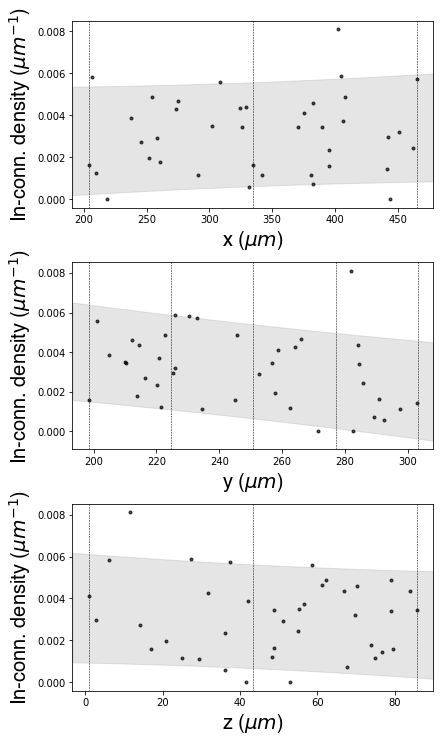

In [9]:
fig = plt.figure(figsize=(6,10), constrained_layout=True)
gs = fig.add_gridspec(3,1)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[2,0])
plot_spatial_ax(ax1, xloc, inconn_density[tune_idx], nbins=3, xlab="x ($\mu m$)")
plot_spatial_ax(ax2, yloc, inconn_density[tune_idx], nbins=5, xlab="y ($\mu m$)")
plot_spatial_ax(ax3, zloc, inconn_density[tune_idx], nbins=3, xlab="z ($\mu m$)")